In [149]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Setting seaborn style for better aesthetics
sns.set_style('whitegrid')

In [150]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('titanic_dataset.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [151]:
# Check the shape of the dataset (number of rows and columns)
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")


Dataset contains 418 rows and 12 columns.



In [152]:
# Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [153]:
# Basic statistics for numerical columns
print("\nBasic statistics of numerical columns:")
print(df.describe())


Basic statistics of numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [154]:
# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [155]:
# Fill missing values for 'Age' and 'Fare' using .loc to avoid chained assignment issues
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].median()
df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].median()

# Drop 'Cabin' column due to excessive missing values, if it exists
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Drop any other rows with missing values
df.dropna(inplace=True)

# Check columns after handling missing values
print("\nColumns after handling missing values:")
print(df.columns)


Columns after handling missing values:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [156]:
# Encode categorical features: 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # 0 = female, 1 = male
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # Encodes Embarked as numerical values

# Drop irrelevant features: 'PassengerId', 'Name', 'Ticket'
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Display the cleaned dataset
print("\nCleaned dataset:")
print(df.head())

# Separate features (X) and target variable (y)
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Splitting the Data
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Cleaned dataset:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  34.5      0      0   7.8292         1
1         1       3    0  47.0      1      0   7.0000         2
2         0       2    1  62.0      0      0   9.6875         1
3         0       3    1  27.0      0      0   8.6625         2
4         1       3    0  22.0      1      1  12.2875         2


In [157]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [158]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Decision Tree Model Evaluation:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
[[50  0]
 [ 0 34]]


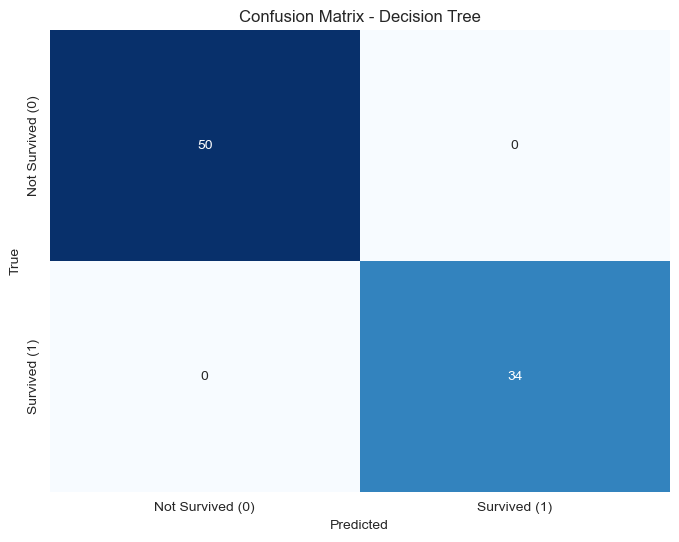

In [159]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("\nDecision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("Classification Report:")
print(report_dt)
print("Confusion Matrix:")
print(matrix_dt)

# Colorful Confusion Matrix Visualization
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Survived (0)', 'Survived (1)'], yticklabels=['Not Survived (0)', 'Survived (1)'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


K-Nearest Neighbors Model Evaluation:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

Confusion Matrix:
[[50  0]
 [ 1 33]]


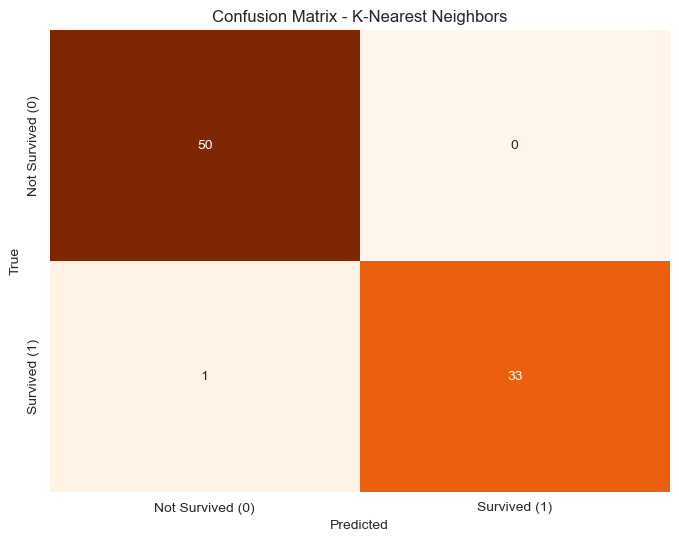

In [160]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("\nK-Nearest Neighbors Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:")
print(report_knn)
print("Confusion Matrix:")
print(matrix_knn)

# Colorful Confusion Matrix Visualization for KNN
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(matrix_knn, annot=True, fmt='d', cmap='Oranges', cbar=False, 
            xticklabels=['Not Survived (0)', 'Survived (1)'], yticklabels=['Not Survived (0)', 'Survived (1)'])
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

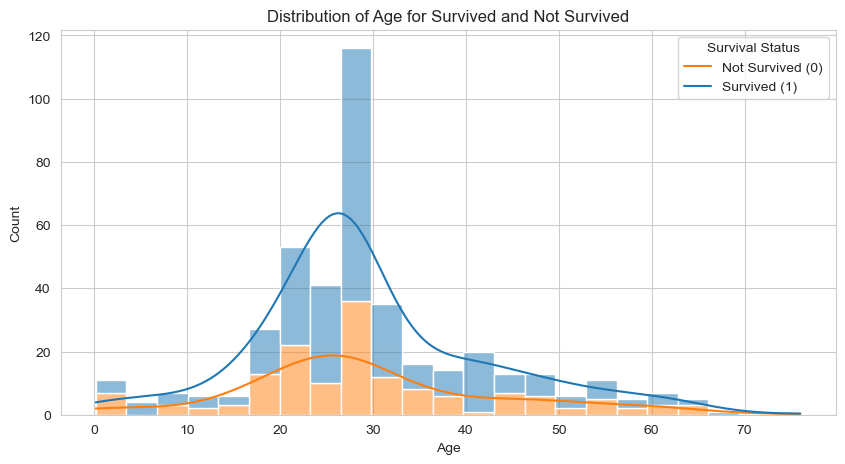

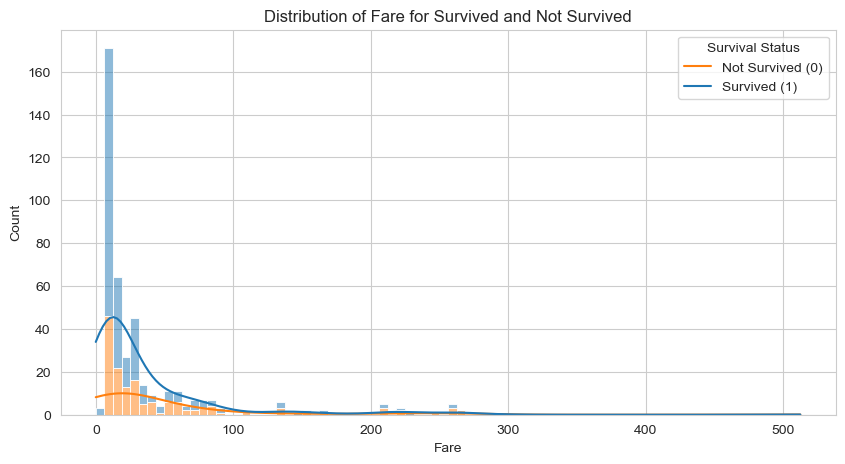

In [161]:
# Data Visualization
# Visualize the distribution of 'Age' feature for 'Survived' and 'Not Survived'
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple="stack")
plt.title('Distribution of Age for Survived and Not Survived')
plt.legend(title='Survival Status', labels=['Not Survived (0)', 'Survived (1)'])
plt.show()

# Visualize the distribution of 'Fare' feature for 'Survived' and 'Not Survived'
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, multiple="stack")
plt.title('Distribution of Fare for Survived and Not Survived')
plt.legend(title='Survival Status', labels=['Not Survived (0)', 'Survived (1)'])
plt.show()

C:\Users\prave\AppData\Local\Temp\ipykernel_20076\1055295630.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Survived', y='Fare', data=df, ci=None, palette='muted')
C:\Users\prave\AppData\Local\Temp\ipykernel_20076\1055295630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Survived', y='Fare', data=df, ci=None, palette='muted')


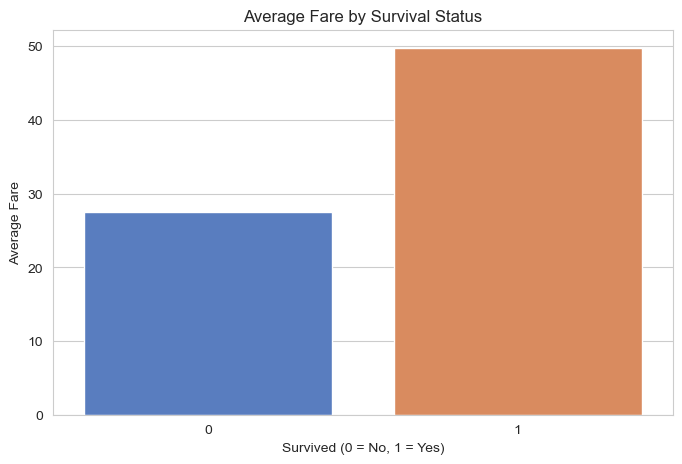

In [162]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Survived', y='Fare', data=df, ci=None, palette='muted')
plt.title('Average Fare by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Average Fare')
plt.show()